In [66]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D

In [82]:
#Carga de datos
mnist_data = pd.read_csv('./train.csv')

In [83]:
#Visualización de los datos
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#train test split 70,30
mnist_data_train, mnist_data_test = train_test_split(mnist_data,test_size=0.3,random_state = 42)
data_train_x = mnist_data_train.drop('label',axis=1)
data_train_y = mnist_data_train['label']
data_test_x = mnist_data_test.drop('label',axis=1)
data_test_y = mnist_data_test['label']

#Reshaping para visualización
data_train_x = data_train_x.values.reshape(-1,28,28)
data_test_x = data_test_x.values.reshape(-1,28,28)

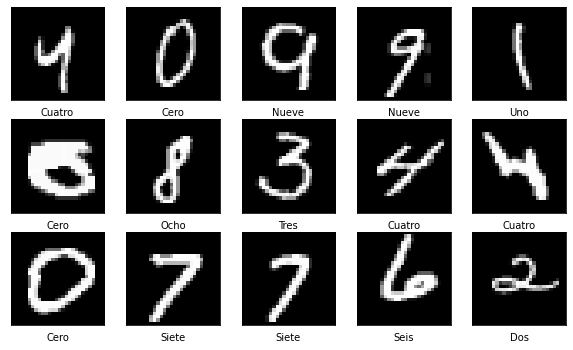

In [85]:
#Exploración de datos
col_names = ['Cero','Uno','Dos','Tres','Cuatro','Cinco','Seis','Siete','Ocho','Nueve']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_train_x[i], cmap='gray')
    plt.xlabel(col_names[data_train_y.iloc[i]])
plt.show()

In [45]:
#Reshaping para entrenamiento
data_train_x = data_train_x.reshape(-1,784)
data_test_x = data_test_x.reshape(-1,784)

In [46]:
data_train_x.shape

(29400, 784)

In [47]:
#Encoding labels
y_train_label = to_categorical(data_train_y, num_classes=10)
y_test_label = to_categorical(data_test_y, num_classes=10)

## ANN

In [54]:
ann = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [60]:
#Compilación de modelo
ann.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [61]:
#Entrenamiento
ann.fit(data_train_x, y_train_label, batch_size=100, epochs=30)

Epoch 1/30
294/294 [==============================] - 2s 3ms/step - loss: 1.2076 - accuracy: 0.6159
Epoch 2/30
294/294 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.8028
Epoch 3/30
294/294 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.8518
Epoch 4/30
294/294 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.8745
Epoch 5/30
294/294 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8861
Epoch 6/30
294/294 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8995
Epoch 7/30
294/294 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.9046
Epoch 8/30
294/294 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.9118
Epoch 9/30
294/294 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 10/30
294/294 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.9202

In [63]:
#Metricas 
test_loss, test_acc = ann.evaluate(data_test_x, y_test_label)

394/394 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.9727


In [64]:
print('Test accuracy: {0:.2f}'.format(test_acc))

Test accuracy: 0.97


## CNN

In [77]:
#Carga de datos
mnist_data = pd.read_csv('./train.csv')

#train test split 60,20,20
mnist_data_train, mnist_data_vt = train_test_split(mnist_data,test_size=0.4,random_state = 42)
mnist_data_validate, mnist_data_test = train_test_split(mnist_data_vt, test_size=0.5, random_state = 42)
data_train_x = mnist_data_train.drop('label',axis=1)
data_train_y = mnist_data_train['label']
data_validate_x = mnist_data_validate.drop('label',axis=1)
data_validate_y = mnist_data_validate['label']
data_test_x = mnist_data_test.drop('label',axis=1)
data_test_y = mnist_data_test['label']

#Reshaping
data_train_x = data_train_x.values.reshape(-1,28,28)
data_validate_x = data_validate_x.values.reshape(-1,28,28)
data_test_x = data_test_x.values.reshape(-1,28,28)

#Encoding labels
y_train_label = to_categorical(data_train_y, num_classes=10)
y_validate_label = to_categorical(data_validate_y, num_classes=10)
y_test_label = to_categorical(data_test_y, num_classes=10)


In [71]:
#Definición de modelo
cnn = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax')
])

In [72]:
#Compilación de modelo
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [78]:
#Entrenamiento
cnn.fit(data_train_x, y_train_label, epochs=5, validation_steps=800, steps_per_epoch=20, validation_data=(data_validate_x, y_validate_label))

Epoch 1/5
20/20 [==============================] - 23s 1s/step - loss: 0.0500 - accuracy: 0.9879 - val_loss: 0.1123 - val_accuracy: 0.9620
Epoch 2/5
20/20 [==============================] - 20s 983ms/step - loss: 0.0411 - accuracy: 0.9903
Epoch 3/5
20/20 [==============================] - 19s 970ms/step - loss: 0.0342 - accuracy: 0.9929
Epoch 4/5
20/20 [==============================] - 19s 974ms/step - loss: 0.0293 - accuracy: 0.9944
Epoch 5/5
20/20 [==============================] - 20s 980ms/step - loss: 0.0242 - accuracy: 0.9958


In [79]:
#Metricas 
test_loss, test_acc = cnn.evaluate(data_test_x, y_test_label)

263/263 [==============================] - 2s 7ms/step - loss: 0.0519 - accuracy: 0.9855


In [80]:
print('Test accuracy: {0:.2f}'.format(test_acc))

Test accuracy: 0.99


## Conclusiones

Para la red neuronal artificial se utilizo una división de datos de 70 - 30 para entrenamiento y prueba, la red obtuvo la métrica accuracy = 0.97

Para la red convolucional se utilizo una división 60 - 20 - 20 para datos de entrenamiento, validación y prueba, la red obtuvo la métrica accuracy = 0.99